In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import pi as π
from scipy.integrate import quad

In [4]:
from scipy.stats import truncexpon

In [4]:
x = 3*np.random.normal(size=10000) + 3

In [5]:
def normal(x,λ,σ):
    return 1.0/np.sqrt(2*π*σ**2)*np.exp(-(x-λ)**2/(2*σ**2))

In [ ]:
tx = np.linspace(-10,10,1000)
plt.plot(tx,normal(tx,3,3))
plt.hist(x, density=True, bins=50)

In [7]:
def trunc_exp(x,b,scale):
    return np.exp(-x/scale)/(1.0-np.exp(-b/scale))/scale

In [21]:
b = 2
scale = 1/3
r = truncexpon.rvs(b=b/scale,scale=scale,size=10000000)
#rp = truncexpon.rvs(b=b/scale,size=10000000)

tr = np.linspace(0,b,1000)

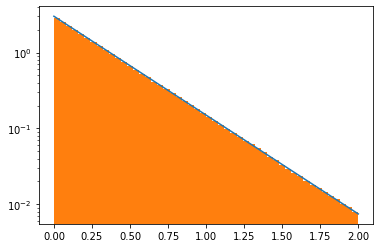

In [23]:
plt.plot(tr,trunc_exp(tr,b,scale));
plt.hist(r, density=True, bins=50);
plt.yscale('log')